In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.express as px
import seaborn as sns
from datetime import *
from dateutil.relativedelta import relativedelta
from optim import *

In [2]:
cutoff_date = datetime(2023, 4, 30).date()
cutoff_date

datetime.date(2023, 4, 30)

In [3]:
pd.read_excel("portfolioTickers.xlsx")

,highCorrelationPortfolio,mixedCorrelationPortfolio,lowCorrelationPortfolio
0,AEE,PNW,ABT
1,AEP,TKO,AIG
2,CMS,AEP,AKAM
3,D,DUK,AXON
4,DTE,SO,CAG
5,DUK,CNC,CTRA
6,ED,DVA,DECK
7,ES,ED,DLTR
8,EVRG,WEC,MNST
9,LNT,AEE,MOH


Downloading historical prices

In [ ]:
tickers = list(pd.read_excel("portfolioTickers.xlsx")["lowCorrelationPortfolio"])
prices = yf.download(tickers = tickers, start = "2015-04-30", end = "2025-04-30", progress = False)["Close"].dropna()
prices

YF.download() has changed argument auto_adjust default to True


Ticker,ABT,AIG,AKAM,AXON,CAG,CTRA,DECK,DLTR,MNST,MOH
Date,,,,,,,,,,
2015-05-01,38.608467,45.171329,74.660004,32.369999,20.556581,25.269518,12.531667,77.730003,23.521667,59.549999
2015-05-04,38.864819,45.531200,75.099998,33.700001,20.871458,25.567417,12.335000,77.309998,23.641666,59.799999
2015-05-05,38.740772,45.374737,75.360001,34.599998,20.809603,25.306602,12.271667,76.339996,23.438334,58.250000
2015-05-06,38.484440,45.492085,75.040001,34.410000,20.916437,25.425833,12.178333,77.150002,23.413334,58.340000
2015-05-07,38.451359,46.133591,75.239998,32.580002,21.006407,25.522709,12.295000,78.010002,23.915001,58.230000
...,...,...,...,...,...,...,...,...,...,...
2025-04-24,129.380005,82.449997,79.199997,590.669983,24.563272,25.459999,110.650002,81.230003,58.590000,313.809998
2025-04-25,128.850006,81.220001,79.790001,603.780029,24.100000,25.370001,109.190002,80.570000,58.669998,314.510010
2025-04-28,129.529999,81.930000,80.180000,602.460022,24.080000,25.719999,109.150002,80.169998,58.490002,320.200012


In [5]:
prices_train = prices.loc[:cutoff_date]
prices_test = prices.loc[cutoff_date:]

In [6]:
returns_train = prices_train.pct_change(fill_method = None).dropna()
returns_train

Ticker,ABT,AIG,AKAM,AXON,CAG,CTRA,DECK,DLTR,MNST,MOH
Date,,,,,,,,,,
2015-05-04,0.006640,0.007967,0.005893,0.041087,0.015318,0.011789,-0.015694,-0.005403,0.005102,0.004198
2015-05-05,-0.003192,-0.003436,0.003462,0.026706,-0.002964,-0.010201,-0.005134,-0.012547,-0.008601,-0.025920
2015-05-06,-0.006617,0.002586,-0.004246,-0.005491,0.005134,0.004711,-0.007606,0.010610,-0.001067,0.001545
2015-05-07,-0.000860,0.014101,0.002665,-0.053182,0.004301,0.003810,0.009580,0.011147,0.021427,-0.001886
2015-05-08,0.023011,0.011870,0.015816,-0.019644,0.004015,0.023650,0.026976,0.014998,-0.104676,0.118324
...,...,...,...,...,...,...,...,...,...,...
2023-04-24,-0.011284,0.005238,-0.003583,-0.002311,0.007209,0.009427,0.006514,0.016359,0.011871,0.029469
2023-04-25,-0.003895,-0.016789,-0.014631,-0.016258,0.011135,-0.021401,-0.027723,-0.007168,0.009497,-0.015441
2023-04-26,-0.011094,-0.002748,-0.009689,-0.021372,-0.008390,-0.018290,0.004787,0.005710,0.000922,-0.013284


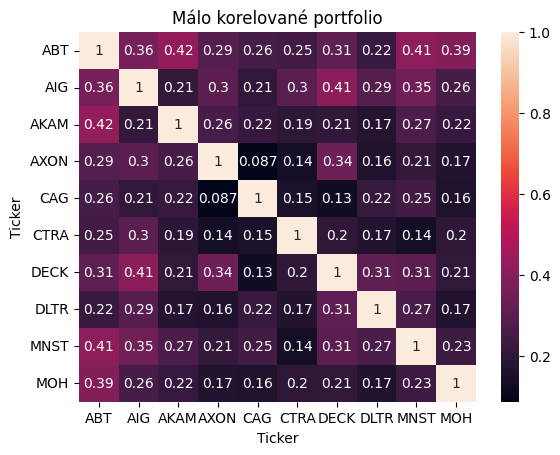

In [7]:
plt.Figure(figsize = (10, 10))
sns.heatmap(returns_train.corr(), annot = True)
plt.title("Málo korelované portfolio")
plt.show()

In [8]:
weightsMVOTangent = MVOTangentPortfolio(prices = prices)
weightsPlot(weightsMVOTangent, title = "MVO tangentní portfolio")

Expected annual return: 22.7%
Annual volatility: 25.0%
Sharpe Ratio: 0.91
(np.float64(0.2268740115684161), np.float64(0.25028821295856907), np.float64(0.906451042526606))


In [9]:
weightsMVOTarget = MVOTargetReturn(prices = prices, target_return = 0.1)
weightsPlot(weightsMVOTarget, title = "MVO optimální portfolio s cílovým výnosem 10% p.a.")

Expected annual return: 10.0%
Annual volatility: 17.3%
Sharpe Ratio: 0.58
(np.float64(0.09999999999999995), np.float64(0.17313149550620538), np.float64(0.5775956576105227))


In [10]:
weightsLWCorrelationTangent = MVOTangentPortfolio(prices = prices, cov_matrix_method = "ledoit_cc")
weightsPlot(weightsLWCorrelationTangent, title = "Robustní MVO tangentní portfolio")

Expected annual return: 22.5%
Annual volatility: 24.8%
Sharpe Ratio: 0.91
(np.float64(0.22541984031123635), np.float64(0.24810859180250455), np.float64(0.908553140677496))


In [11]:
weightsLWCorrelationTarget = MVOTargetReturn(prices = prices, target_return = 0.1, cov_matrix_method = "ledoit_cc")
weightsPlot(weightsLWCorrelationTarget, title = "Robustní MVO portfolio s cílovým výnosem 10% p.a.")

Expected annual return: 10.0%
Annual volatility: 17.3%
Sharpe Ratio: 0.58
(np.float64(0.09999999999999994), np.float64(0.17306360055736106), np.float64(0.5778222553901821))


In [12]:
weightsCustomDeltaTangent = RobustLedoitWolfCustomDeltaMaxSharpe(prices = prices, custom_delta = 0.5)
weightsPlot(weightsCustomDeltaTangent, title = "Robustní tangentní portfolio s deltou 0.5")

Expected annual return: 23.3%
Annual volatility: 21.8%
Sharpe Ratio: 1.07
(np.float64(0.23301614268647888), np.float64(0.21764608109401345), np.float64(1.0706195191533279))


In [13]:
weightsCustomDeltaTarget = RobustLedoitWolfCustomDeltaTargetReturn(prices = prices, target_return = 0.1, custom_delta = 0.5)
weightsPlot(weightsCustomDeltaTarget, title = "Robustní portfolio s deltou 0.5 a cílovým výnosem 10% p.a.")

Expected annual return: 10.0%
Annual volatility: 15.0%
Sharpe Ratio: 0.67
(np.float64(0.09999999999999996), np.float64(0.1499093941042946), np.float64(0.667069602925806))


In [14]:
weightsMinCVaR = CVaROptimizationMinCVAR(prices= prices, alpha = 0.05)
weightsPlot(weightsMinCVaR, title = "CVaR optimální portfolio")

Expected annual return: 7.0%
Conditional Value at Risk: 2.53%
(np.float64(0.06965846291035402), np.float64(0.02525214524040277))


In [15]:
anr = pd.DataFrame()

for ticker in tickers:
    rec = pd.read_excel(r"C:\Users\miros\Desktop\masters\BL_Input\AnalystRecommendation.xlsx", sheet_name = ticker)
    rec["Ticker"] = ticker
    anr = pd.concat([anr, rec])

anr["Upside"] = anr["Target Price"] / anr["Last Price"] - 1
anr

,Dates,Target Price,Last Price,Buy %,Hold %,Sell %,Price Spread,Ticker,Upside
0,2023-04-25,123.590912,109.97,0.740741,0.222222,0.037037,13.620912,ABT,0.123860
1,2023-05-25,123.590912,102.14,0.750000,0.214286,0.035714,21.450912,ABT,0.210015
2,2023-06-25,122.636360,108.05,0.730769,0.230769,0.038462,14.586360,ABT,0.134996
3,2023-07-25,124.105263,112.93,0.730769,0.269231,0.000000,11.175263,ABT,0.098957
4,2023-08-25,124.105263,104.21,0.730769,0.269231,0.000000,19.895263,ABT,0.190915
...,...,...,...,...,...,...,...,...,...
20,2024-12-25,361.333344,295.19,0.312500,0.625000,0.062500,66.143344,MOH,0.224070
21,2025-01-25,358.571442,304.33,0.312500,0.625000,0.062500,54.241442,MOH,0.178232
22,2025-02-25,331.333344,305.97,0.312500,0.625000,0.062500,25.363344,MOH,0.082895
23,2025-03-25,330.933319,310.53,0.375000,0.500000,0.125000,20.403319,MOH,0.065705


In [16]:
views = anr.loc[anr["Dates"] == "2023-04-25"][["Ticker", "Upside"]].set_index("Ticker")
views = views["Upside"].to_dict()
views

{'ABT': 0.12386025157074099,
 'AKAM': 0.14159080627295473,
 'CAG': 0.10401529633192474,
 'DECK': 0.04229069422896625,
 'MNST': 0.003592736913233807,
 'MOH': 0.25523668003437416}

In [17]:
weightsBLTangent = blackLittermanAbsoluteViewsMaxSharpe(prices = prices, views = views)
weightsPlot(weightsBLTangent, title = "Black-Litterman tangentní portfolio")

Expected annual return: 13.8%
Annual volatility: 19.2%
Sharpe Ratio: 0.72
(np.float64(0.13786194758314302), np.float64(0.1924281516138753), np.float64(0.7164333618907053))


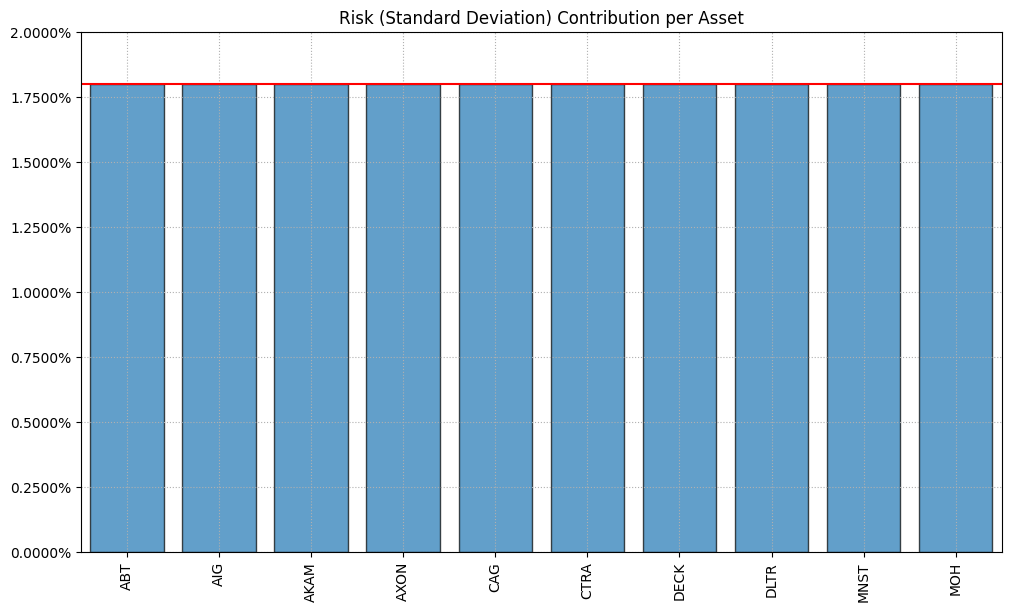

In [18]:
weightsRP_std, rpPlot = riskParityERC(prices = prices)
weightsPlot(weightsRP_std, title = "Rizikově paritní portfolio (směrodatná odchylka)")

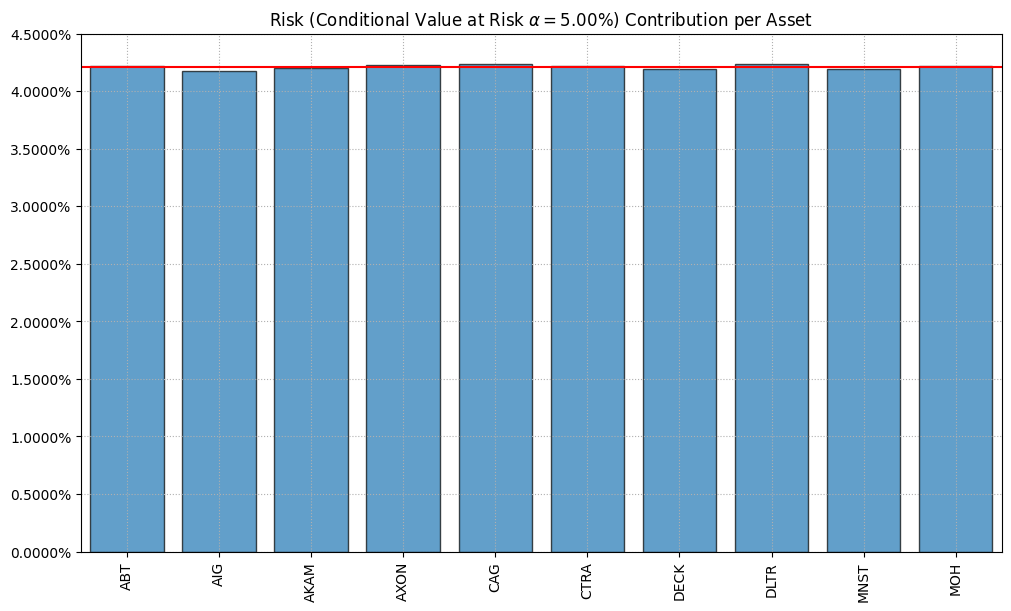

In [19]:
weightsRP_CVaR, rpPlot = riskParityERC(prices = prices, risk_measure = "CVaR")
weightsPlot(weightsRP_CVaR, title = "Rizikově paritní portfolio (CVaR)")

Hierarchical risk parity

In [20]:
in_sample = {
    'MVO Tangent': (weightsRebalancing(weightsMVOTangent, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'MVO Target 10%': (weightsRebalancing(weightsMVOTarget, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'LedoitWolf Tangent': (weightsRebalancing(weightsLWCorrelationTangent, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'LedoitWolf Target 10%': (weightsRebalancing(weightsLWCorrelationTarget, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'MVO Tangent (d = 0.5)': (weightsRebalancing(weightsCustomDeltaTangent, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'MVO Target 10% (d = 0.5)': (weightsRebalancing(weightsCustomDeltaTarget, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'CVaR': (weightsRebalancing(weightsMinCVaR, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'Black-Litterman Tangent': (weightsRebalancing(weightsBLTangent, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'RP (std)': (weightsRebalancing(weightsRP_std, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
    'RP (CVaR)': (weightsRebalancing(weightsRP_CVaR, returns_df = returns_train, rebalance_freq = "ME") * returns_train).sum(axis = 1),
}

in_sample_returns = pd.DataFrame(in_sample)
in_sample_cumulative_returns = (1 + in_sample_returns).cumprod()
in_sample_cumulative_returns_max = in_sample_cumulative_returns.cummax()
in_sample_drawdowns = (in_sample_cumulative_returns - in_sample_cumulative_returns_max)/in_sample_cumulative_returns_max

px.line(in_sample_cumulative_returns)

In [21]:
px.line(in_sample_drawdowns, title = 'Drawdowns')

In [22]:
in_sample_returns.std().sort_values().map('{:.3%}'.format)

CVaR                        1.137%
MVO Target 10%              1.143%
LedoitWolf Target 10%       1.144%
MVO Target 10% (d = 0.5)    1.170%
RP (std)                    1.181%
RP (CVaR)                   1.189%
Black-Litterman Tangent     1.277%
LedoitWolf Tangent          1.633%
MVO Tangent                 1.643%
MVO Tangent (d = 0.5)       1.689%
dtype: object

In [23]:
in_sample_drawdowns.min().sort_values().map('{:.3%}'.format)

MVO Tangent (d = 0.5)       -34.303%
MVO Tangent                 -33.900%
LedoitWolf Tangent          -33.678%
Black-Litterman Tangent     -25.965%
RP (CVaR)                   -23.465%
RP (std)                    -23.413%
MVO Target 10% (d = 0.5)    -23.265%
LedoitWolf Target 10%       -23.050%
MVO Target 10%              -22.191%
CVaR                        -19.542%
dtype: object

In [24]:
in_sample_cagr = (1 + in_sample_returns).prod() ** (252 / len(in_sample_returns)) - 1
in_sample_cagr.sort_values().map('{:.2%}'.format)

CVaR                        19.60%
LedoitWolf Target 10%       21.94%
MVO Target 10%              22.38%
Black-Litterman Tangent     23.51%
RP (std)                    23.84%
MVO Target 10% (d = 0.5)    23.92%
RP (CVaR)                   24.37%
LedoitWolf Tangent          35.73%
MVO Tangent                 36.04%
MVO Tangent (d = 0.5)       37.31%
dtype: object

In [25]:
returns_test = prices_test.pct_change(fill_method=None).dropna()
returns_test

Ticker,ABT,AIG,AKAM,AXON,CAG,CTRA,DECK,DLTR,MNST,MOH
Date,,,,,,,,,,
2023-05-02,0.003510,-0.021850,-0.019618,0.019537,0.006018,-0.044418,-0.002140,0.006638,0.012315,-0.025957
2023-05-03,0.002332,-0.011169,-0.006332,0.002997,-0.009363,-0.008639,-0.000021,-0.015386,0.014251,-0.005881
2023-05-04,-0.008053,-0.028627,-0.018098,-0.008059,-0.012339,0.001660,-0.012662,-0.004136,-0.009253,-0.015077
2023-05-05,0.003608,0.078388,0.019730,0.003697,0.005316,0.039354,0.013514,0.024987,0.032688,0.028041
2023-05-08,-0.003236,-0.000744,0.010056,0.008867,-0.002115,-0.009167,0.019413,0.000450,-0.011221,-0.015190
...,...,...,...,...,...,...,...,...,...,...
2025-04-24,-0.003543,0.009798,0.043891,0.023869,-0.011895,0.003943,0.037409,-0.026369,-0.008462,-0.054789
2025-04-25,-0.004096,-0.014918,0.007450,0.022195,-0.018860,-0.003535,-0.013195,-0.008125,0.001365,0.002231
2025-04-28,0.005277,0.008742,0.004888,-0.002186,-0.000830,0.013796,-0.000366,-0.004965,-0.003068,0.018092


In [26]:
out_of_sample = {
    'MVO Tangent': (weightsRebalancing(weightsMVOTangent, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'MVO Target 10%': (weightsRebalancing(weightsMVOTarget, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'LedoitWolf Tangent': (weightsRebalancing(weightsLWCorrelationTangent, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'LedoitWolf Target 10%': (weightsRebalancing(weightsLWCorrelationTarget, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'MVO Tangent (d = 0.5)': (weightsRebalancing(weightsCustomDeltaTangent, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'MVO Target 10% (d = 0.5)': (weightsRebalancing(weightsCustomDeltaTarget, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'CVaR': (weightsRebalancing(weightsMinCVaR, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'Black-Litterman Tangent': (weightsRebalancing(weightsBLTangent, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'RP (std)': (weightsRebalancing(weightsRP_std, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
    'RP (CVaR)': (weightsRebalancing(weightsRP_CVaR, returns_df = returns_test, rebalance_freq = "ME") * returns_test).sum(axis = 1),
}

out_of_sample_returns = pd.DataFrame(out_of_sample)
out_of_sample_cumulative_returns = (1 + out_of_sample_returns).cumprod()
out_of_sample_cumulative_returns_max = out_of_sample_cumulative_returns.cummax()
out_of_sample_drawdowns = (out_of_sample_cumulative_returns - out_of_sample_cumulative_returns_max)/out_of_sample_cumulative_returns_max

px.line(out_of_sample_cumulative_returns)

In [27]:
out_of_sample_returns.std().sort_values(ascending=False).map('{:.3%}'.format)

MVO Tangent (d = 0.5)       1.392%
MVO Tangent                 1.319%
LedoitWolf Tangent          1.309%
Black-Litterman Tangent     0.892%
RP (CVaR)                   0.876%
RP (std)                    0.872%
MVO Target 10% (d = 0.5)    0.856%
CVaR                        0.844%
MVO Target 10%              0.831%
LedoitWolf Target 10%       0.827%
dtype: object

In [28]:
out_of_sample_drawdowns.min().sort_values().map('{:.3%}'.format)

MVO Tangent (d = 0.5)       -16.467%
LedoitWolf Tangent          -16.065%
MVO Tangent                 -15.947%
Black-Litterman Tangent     -12.120%
MVO Target 10%              -11.705%
LedoitWolf Target 10%       -11.657%
CVaR                        -11.096%
RP (CVaR)                    -9.717%
MVO Target 10% (d = 0.5)     -9.703%
RP (std)                     -9.618%
dtype: object

In [29]:
out_of_sample_cagr = (1 + out_of_sample_returns).prod() ** (252 / len(out_of_sample_returns)) - 1
out_of_sample_cagr.sort_values(ascending=False).map('{:.2%}'.format)

MVO Tangent (d = 0.5)       44.63%
MVO Tangent                 42.71%
LedoitWolf Tangent          42.39%
Black-Litterman Tangent     18.99%
RP (CVaR)                   16.40%
RP (std)                    15.72%
MVO Target 10% (d = 0.5)    15.39%
LedoitWolf Target 10%       11.50%
MVO Target 10%              11.37%
CVaR                         5.90%
dtype: object

In [30]:
(out_of_sample_cagr / (out_of_sample_returns.std() * np.sqrt(252))).sort_values(ascending= False)

LedoitWolf Tangent          2.039866
MVO Tangent                 2.039205
MVO Tangent (d = 0.5)       2.019267
Black-Litterman Tangent     1.342149
RP (CVaR)                   1.179934
RP (std)                    1.135722
MVO Target 10% (d = 0.5)    1.133517
LedoitWolf Target 10%       0.875557
MVO Target 10%              0.861937
CVaR                        0.440864
dtype: float64